In [1]:
import os
import typing as t
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
tqdm.pandas()

In [3]:
DATA_DIR = Path(os.path.expanduser('~/jigsaw-toxic/data'))
RUDDIT_SRC_DIR = DATA_DIR / 'ruddit'
JIGSAW_TOXIC_SEVERITY_RATING_DIR = DATA_DIR / 'jigsaw-toxic-severity-rating'
RUDDIT_DATASET_DIR = DATA_DIR / 'datasets/ruddit'

In [4]:
!mkdir -p $RUDDIT_DATASET_DIR

In [5]:
!cp $JIGSAW_TOXIC_SEVERITY_RATING_DIR/valid.csv $RUDDIT_DATASET_DIR/valid.csv

In [6]:
valid_df = pd.read_csv(str(RUDDIT_DATASET_DIR / 'valid.csv'))

In [7]:
valid_df

,less_toxic,more_toxic,certainty
0,"I think people say its not so absurd, because ...",Re Vandalism. . . . that is because the user ...,0.666667
1,You must have the lowest IQ of anyone on wikip...,Wha's a reliable source mike? Something that c...,1.000000
2,"Thanks for removing more of his anonymous, un...","To Bad\nyou dont have the balls to sign in, I ...",1.000000
3,"""\n\nActually, it clearly does not involve pow...",", 18 November 2006 (UTC)\n\nWell comrade. Look...",0.666667
4,You are not cool \n\nYou are the most hated f...,"""== Hey Fuck-head==\nHey, just wanted to say ""...",1.000000
...,...,...,...
10103,Heeeeeeeeeeeeeeyyyyyyyyyyyy dude! Sup!,you deleted my page \nand i am extrememly mad ...,1.000000
10104,ATTENTION:''''''\n\nANYONE WHO OPPOSES MY OPIN...,suck dick u disrespectful swearing wank!!,1.000000
10105,"Oh yah, and Bayerischermann is another guy try...",Thanks. Also thanks for freezing the article. ...,1.000000
10106,I had to chop out a section specifically compa...,"""\n\nHorrifyingly enough, """"ritualistic penis ...",0.666667


In [4]:
ruddit_df = pd.read_csv(RUDDIT_SRC_DIR / 'ruddit_with_text.csv')

In [5]:
ruddit_df

,post_id,comment_id,txt,url,offensiveness_score
0,42g75o,cza1q49,> The difference in average earnings between m...,https://www.reddit.com/r/changemyview/comments...,-0.083
1,42g75o,cza1wdh,"The myth is that the ""gap"" is entirely based o...",https://www.reddit.com/r/changemyview/comments...,-0.022
2,42g75o,cza23qx,[deleted],https://www.reddit.com/r/changemyview/comments...,0.167
3,42g75o,cza2bw8,The assertion is that women get paid less for ...,https://www.reddit.com/r/changemyview/comments...,-0.146
4,42g75o,cza2iji,You said in the OP that's not what they're mea...,https://www.reddit.com/r/changemyview/comments...,-0.083
...,...,...,...,...,...
466,826qe4,dv8uend,if a healthy kid gets autism after getting vac...,https://www.reddit.com/r/changemyview/comments...,0.045
467,826qe4,dv8vp6f,Prosecuting parents who refuse to vaccinate so...,https://www.reddit.com/r/changemyview/comments...,0.104
468,826qe4,dv8xz94,Probably not. This is why I refused hep B and ...,https://www.reddit.com/r/changemyview/comments...,0.000
469,7k945q,dvf4bbr,I love how this thread instantly went into gun...,https://www.reddit.com/r/changemyview/comments...,-0.354


In [6]:
ruddit_df = ruddit_df[ruddit_df['txt'] != '[deleted]'].copy().reset_index(drop=True)

In [7]:
ruddit_df

,post_id,comment_id,txt,url,offensiveness_score
0,42g75o,cza1q49,> The difference in average earnings between m...,https://www.reddit.com/r/changemyview/comments...,-0.083
1,42g75o,cza1wdh,"The myth is that the ""gap"" is entirely based o...",https://www.reddit.com/r/changemyview/comments...,-0.022
2,42g75o,cza2bw8,The assertion is that women get paid less for ...,https://www.reddit.com/r/changemyview/comments...,-0.146
3,42g75o,cza2iji,You said in the OP that's not what they're mea...,https://www.reddit.com/r/changemyview/comments...,-0.083
4,42g75o,cza2jj3,>Men and women are not payed less for the same...,https://www.reddit.com/r/changemyview/comments...,-0.042
...,...,...,...,...,...
448,826qe4,dv8uend,if a healthy kid gets autism after getting vac...,https://www.reddit.com/r/changemyview/comments...,0.045
449,826qe4,dv8vp6f,Prosecuting parents who refuse to vaccinate so...,https://www.reddit.com/r/changemyview/comments...,0.104
450,826qe4,dv8xz94,Probably not. This is why I refused hep B and ...,https://www.reddit.com/r/changemyview/comments...,0.000
451,7k945q,dvf4bbr,I love how this thread instantly went into gun...,https://www.reddit.com/r/changemyview/comments...,-0.354


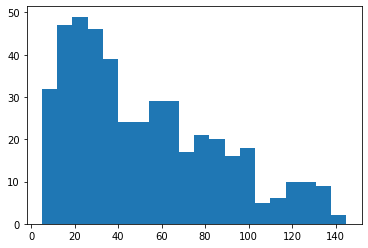

In [8]:
plt.hist([len(row['txt'].split(' ')) for _, row in ruddit_df.iterrows()], bins=20);

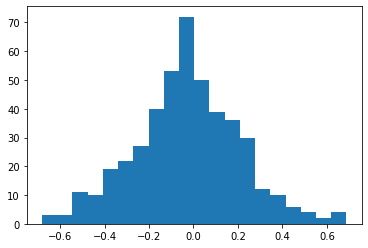

In [9]:
plt.hist(ruddit_df['offensiveness_score'], bins=20);

In [14]:
ruddit_df['offensiveness_score'] = ruddit_df['offensiveness_score'].progress_apply(lambda s: (s + 1.0) / 2)

  0%|          | 0/453 [00:00<?, ?it/s]

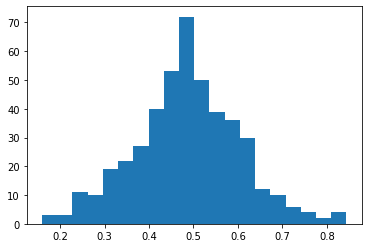

In [15]:
plt.hist(ruddit_df['offensiveness_score'], bins=20);

In [16]:
ruddit_df = ruddit_df.rename({'txt': 'comment_text', 'offensiveness_score': 'score'}, axis=1).drop(['comment_id', 'post_id', 'url'], axis=1)
ruddit_df

,comment_text,score
0,> The difference in average earnings between m...,0.4585
1,"The myth is that the ""gap"" is entirely based o...",0.4890
2,The assertion is that women get paid less for ...,0.4270
3,You said in the OP that's not what they're mea...,0.4585
4,>Men and women are not payed less for the same...,0.4790
...,...,...
448,if a healthy kid gets autism after getting vac...,0.5225
449,Prosecuting parents who refuse to vaccinate so...,0.5520
450,Probably not. This is why I refused hep B and ...,0.5000
451,I love how this thread instantly went into gun...,0.3230


In [35]:
ruddit_df.to_csv(RUDDIT_DATASET_DIR / 'train.csv', index=False)

In [11]:
ruddit_no_quote_df = pd.read_csv(RUDDIT_DATASET_DIR / 'train_no_quote.csv')

In [12]:
ruddit_no_quote_df

,comment_text,score
0,"\nSo it isn't a myth, you just feel that you c...",0.4585
1,"The myth is that the ""gap"" is entirely based o...",0.4890
2,The assertion is that women get paid less for ...,0.4270
3,You said in the OP that's not what they're mea...,0.4585
4,\nI don't think many people say this is the ca...,0.4790
...,...,...
448,if a healthy kid gets autism after getting vac...,0.5225
449,Prosecuting parents who refuse to vaccinate so...,0.5520
450,Probably not. This is why I refused hep B and ...,0.5000
451,I love how this thread instantly went into gun...,0.3230


In [32]:
def _remove_quote(text: str) -> str:
    if not text.startswith('>'):
        return text
    return '\n'.join(text.split('\n')[1:])

In [33]:
no_quote_ruddit_df = ruddit_df.copy()
no_quote_ruddit_df['comment_text'] = no_quote_ruddit_df['comment_text'].apply(_remove_quote)

In [36]:
no_quote_ruddit_df.to_csv(RUDDIT_DATASET_DIR / 'train_no_quote.csv', index=False)